# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [3]:
df = pd.read_csv("Online_Retail_Train.csv")

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [4]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64


In [5]:
df1 = df.drop_duplicates()

In [ ]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [ ]:
search_results = df1['InvoiceNo'].str.contains('A')
df1[search_results]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51050,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
279008,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
405078,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [ ]:
search_results = df1['InvoiceNo'].str.contains('C')
df1[search_results]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
34,C578367,22759,SET OF 3 NOTEBOOKS IN PARCEL,-12,2011-11-24 11:00:00,1.65,14640.0,United Kingdom
121,C573010,20979,36 PENCILS TUBE RED RETROSPOT,-11,2011-10-27 12:29:00,1.25,13735.0,United Kingdom
219,C570828,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
220,C563693,84050,PINK HEART SHAPE EGG FRYING PAN,-1,2011-08-18 13:04:00,1.65,17243.0,United Kingdom
...,...,...,...,...,...,...,...,...
514660,C574954,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-3,2011-11-08 09:52:00,4.95,18223.0,United Kingdom
514692,C554029,22423,REGENCY CAKESTAND 3 TIER,-1,2011-05-20 13:54:00,12.75,12681.0,France
514696,C552805,21155,RED RETROSPOT PEG BAG,-6,2011-05-11 12:34:00,2.55,14149.0,United Kingdom
514700,C546870,M,Manual,-2,2011-03-17 16:07:00,2.50,14462.0,United Kingdom


In [ ]:
# Drop the rows where quantity is adjusted
df1 = df1[~df1['InvoiceNo'].str.contains('A')]

In [ ]:
# Adjust the quantity for cancelled
df1.loc[search_results, 'Quantity'] = -1 * df1.loc[search_results, 'Quantity']

In [ ]:
search_results.info()

<class 'pandas.core.series.Series'>
Int64Index: 510059 entries, 0 to 514812
Series name: InvoiceNo
Non-Null Count   Dtype
--------------   -----
510059 non-null  bool 
dtypes: bool(1)
memory usage: 20.5 MB


In [ ]:
df1.count()

NameError: name 'df1' is not defined

In [6]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64


In [ ]:
# handling missing values
pandas_feature=['Description','CustomerID']
df1.dropna(subset=pandas_feature, inplace=True)

# Fill the remaining null values in the pandas feature with the mean value
mean_value = df1[pandas_feature].mean()
df1[pandas_feature].fillna(mean_value, inplace=True)

# Print the updated DataFrame
print(df1)

In [7]:
# Removing Rows
feature = 'StockCode'
df1 = df1.drop(df1[df1[feature].isin( ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'])].index)
# Equivalent Another Way
df1 = df1.query("StockCode not in ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']")

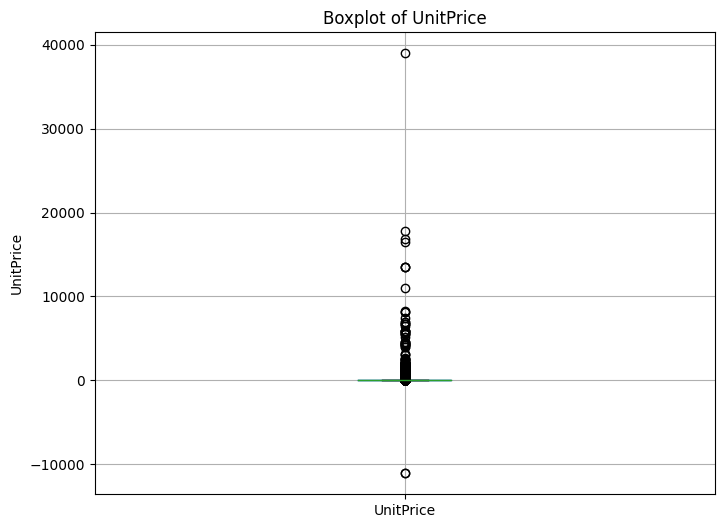

In [8]:
# Create a boxplot using pandas
df.boxplot(column='UnitPrice', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of UnitPrice')
plt.ylabel('UnitPrice')

# Show the plot
plt.show()

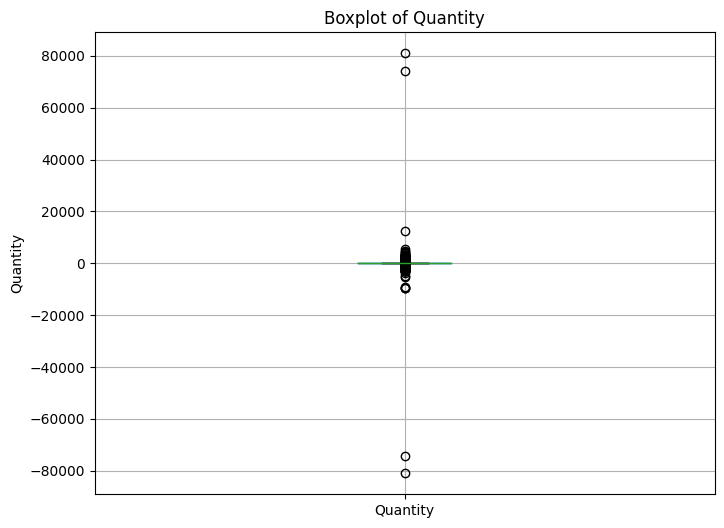

In [9]:
# Create a boxplot using pandas
df.boxplot(column='Quantity', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [27]:
df1= remove_outliers_iqr(df1, 'Quantity')


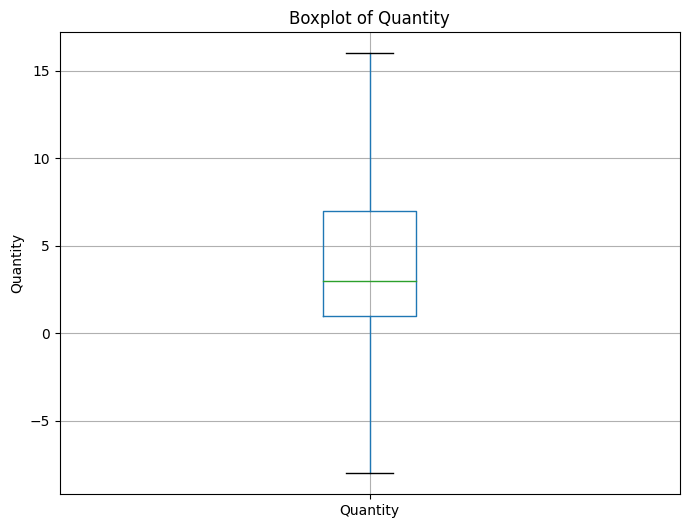

In [28]:
# Create a boxplot using pandas
df1.boxplot(column='Quantity', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [29]:
df1= remove_outliers_iqr(df1, 'UnitPrice')

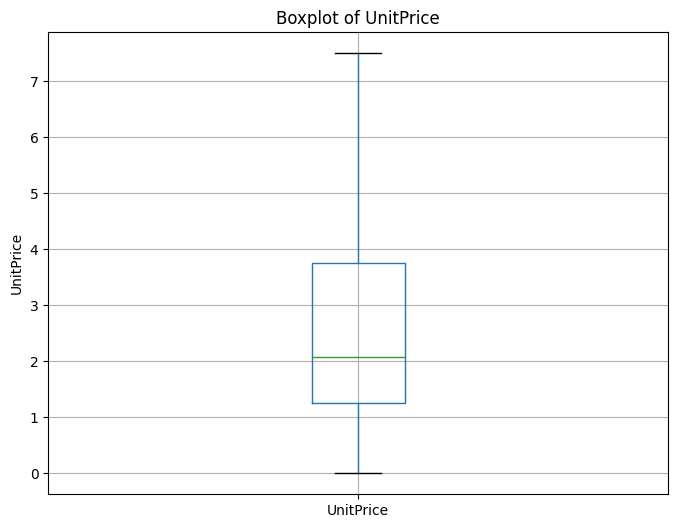

In [30]:
# Create a boxplot using pandas
df1.boxplot(column='UnitPrice', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of UnitPrice')
plt.ylabel('UnitPrice')

# Show the plot
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316812 entries, 1 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    316812 non-null  object 
 1   StockCode    316812 non-null  object 
 2   Description  316812 non-null  object 
 3   Quantity     316812 non-null  int64  
 4   InvoiceDate  316812 non-null  object 
 5   UnitPrice    316812 non-null  float64
 6   CustomerID   316812 non-null  float64
 7   Country      316812 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 21.8+ MB


In [25]:
df1['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()


In [ ]:
df1['DayOfWeek']

1            Sunday
2            Monday
5         Wednesday
7          Thursday
8            Friday
            ...    
514803     Thursday
514806      Tuesday
514808       Sunday
514809       Monday
514812     Thursday
Name: DayOfWeek, Length: 316812, dtype: object

In [26]:
def drop_duplicate_fill_mean(df, feature):
    # Drop the duplicate values in the pandas feature
    df.drop_duplicates(subset=[feature], inplace=True)

    # Fill the remaining null values in the pandas feature with the mean value
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

    # Return the updated DataFrame
    return df

def drop_null_fill_mean(df, feature):
    # Drop the rows with null values in the pandas feature
    df.dropna(subset=[feature], inplace=True)

    # Fill the remaining null values in the pandas feature with the mean value
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

    # Return the updated DataFrame
    return df

def adjust_feature_value(df, search_feature, target_feature, character):
    # Search for the character in the search feature
    df.loc[df[search_feature].str.contains(character), target_feature] *= -1

    # Return the updated DataFrame
    return df

def remove_rows_by_feature_value(data, feature, selected_values):
    # Remove rows based on feature values using isin
    data = data[~data[feature].isin(selected_values)]
    # Print the updated data
    print(data)

# Outlier removal based on Z Score
def remove_outliers(data, feature):
    # Calculate the z-score for the feature
    z_scores = (data[feature] - data[feature].mean()) / data[feature].std()

    # Define a threshold for outlier detection
    threshold = 3

    # Remove rows with z-scores greater than the threshold
    data = data[z_scores.abs() <= threshold]

    # Return the updated data
    return data

# Outlier removal based on IQR
def remove_outliers_iqr(data, feature):
    # Calculate the interquartile range for the feature
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove rows with values outside the bounds
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    # Return the updated data
    return data

def identify_outliers_by_boxplot(data, feature):
    # Calculate the interquartile range (IQR) for the feature
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers based on the boxplot method
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Return the outliers
    return outliers

def create_day_of_week_column(dataframe):
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    dataframe['DayOfWeek'] = dataframe['InvoiceDate'].dt.day_name()
    return dataframe


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

Number of free items: 1136
United Kingdom          365035
Germany                   6136
France                    5573
EIRE                      4909
Spain                     1709
Belgium                   1403
Switzerland               1179
Portugal                  1062
Norway                     577
Italy                      521
Australia                  457
Netherlands                428
Channel Islands            425
Cyprus                     415
Finland                    411
Unspecified                325
Austria                    287
Poland                     213
Denmark                    184
Sweden                     174
Israel                     159
USA                        149
Hong Kong                  146
Iceland                    125
Japan                      102
Greece                     100
Singapore                   98
Canada                      89
Malta                       87
United Arab Emirates        44
RSA                         42
European Com

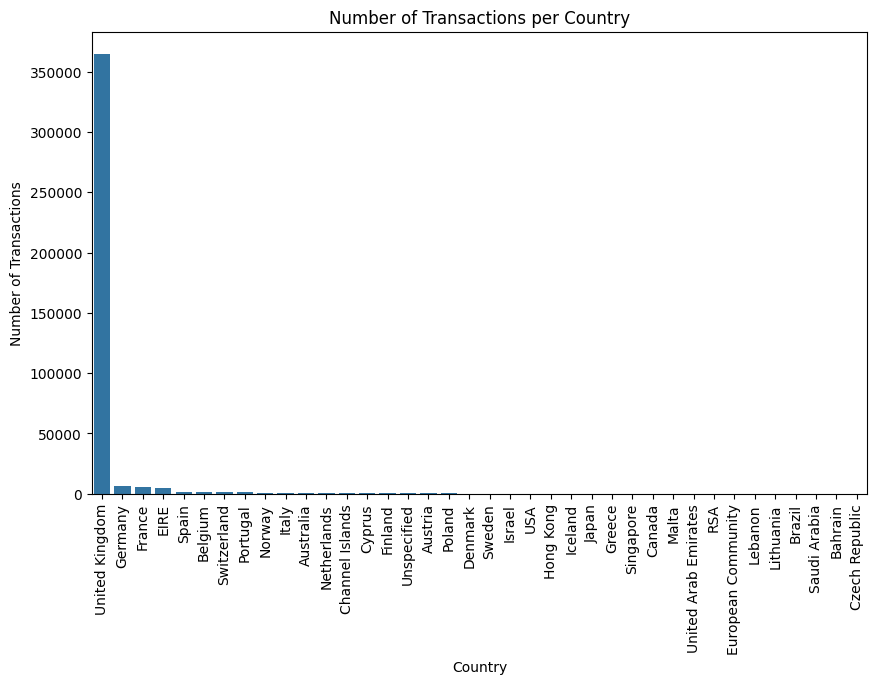

Ratio of repeat purchasers vs single-time purchasers: 2.0536370315944157


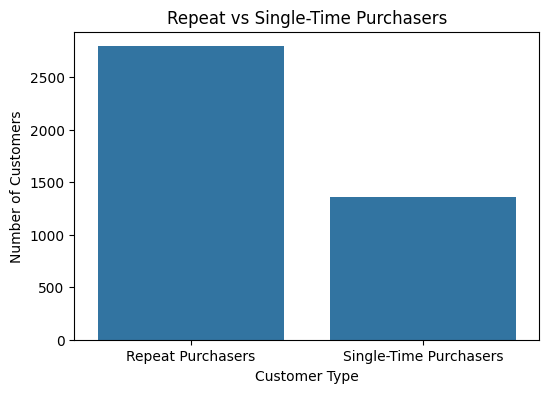

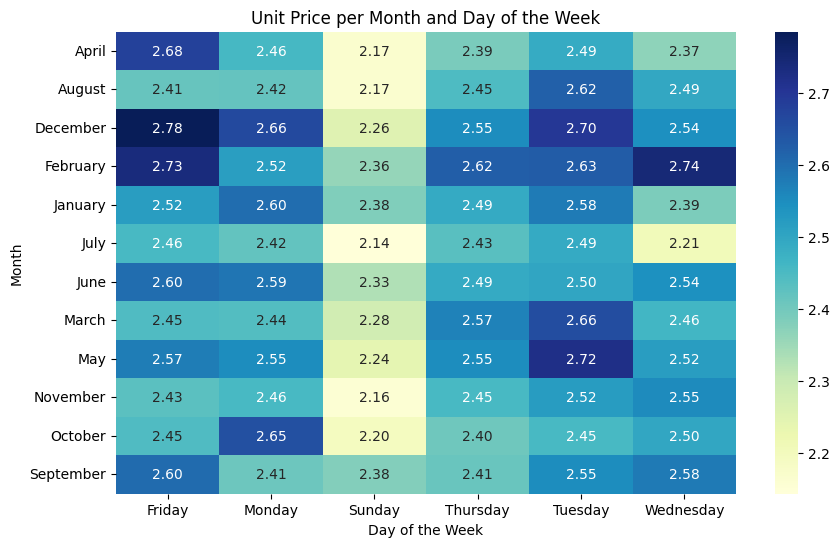

Top 10 customers who bought the most items:
CustomerID
14911.0    29794
17841.0    15376
14096.0    11933
13089.0    10863
12748.0     9955
15039.0     5395
15311.0     5307
13081.0     5198
14156.0     4736
17735.0     4607
Name: Quantity, dtype: int64
Top 10 items bought by most customers:
StockCode
85123A    726
47566     640
22720     600
22138     555
22457     552
84879     550
23298     540
22960     536
85099B    535
22086     508
Name: CustomerID, dtype: int64


In [32]:
# Feature Engineering
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']

# Check for free items
free_items = df1[df1['UnitPrice'] == 0]
num_free_items = len(free_items)
print("Number of free items:", num_free_items)

# Number of transactions per country
transactions_per_country = df1['Country'].value_counts()
print(transactions_per_country)

# Visualize transactions per country
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Country')
plt.show()

# Ratio of repeat purchasers vs single-time purchasers
customer_repeat_status = df1.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = sum(customer_repeat_status > 1)
single_time_customers = sum(customer_repeat_status == 1)
ratio_repeat_vs_single = repeat_customers / single_time_customers
print("Ratio of repeat purchasers vs single-time purchasers:", ratio_repeat_vs_single)

# Visualize repeat vs single-time purchasers
plt.figure(figsize=(6, 4))
sns.barplot(x=['Repeat Purchasers', 'Single-Time Purchasers'], y=[repeat_customers, single_time_customers])
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.title('Repeat vs Single-Time Purchasers')
plt.show()

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


# Create heatmap for unit price per month and day of the week
df1['Month'] = df1['InvoiceDate'].dt.month_name()
df1['DayOfWeek'] = df1['InvoiceDate'].dt.day_name()

heatmap_data = df1.pivot_table(index='Month', columns='DayOfWeek', values='UnitPrice', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Unit Price per Month and Day of the Week')
plt.show()

# Finding top 10 customers who bought the most items
top_customers = df1.groupby('CustomerID')['Quantity'].sum().nlargest(10)
print("Top 10 customers who bought the most items:")
print(top_customers)

# Finding top 10 items bought by most customers
top_items = df1.groupby('StockCode')['CustomerID'].nunique().nlargest(10)
print("Top 10 items bought by most customers:")
print(top_items)

## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [33]:
def feature_engineering(df):
    # Drop unwanted columns
    df.drop(['InvoiceNo', 'Description'], axis=1, inplace=True)

    # Create new column for Total amount spent by each customer
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

    # Group by CustomerID and aggregate the sum of Quantity and TotalAmount
    df_grouped = df.groupby('CustomerID').agg({
        'Quantity': 'sum',
        'TotalAmount': 'sum',
        'Country': 'first'  # Keep the first country value for each customer
    }).reset_index()

    return df_grouped

In [34]:
df_train = feature_engineering(df1)

### Scale the data

Apply `StandardScaler` on the features.

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Define the features to be scaled
features_to_scale = ['Quantity', 'TotalAmount']

# Fit and transform StandardScaler on training data
df_train_scaled = df_train.copy()  # Create a copy of the training data
df_train_scaled[features_to_scale] = scaler.fit_transform(df_train_scaled[features_to_scale])

# Print first few rows of the scaled training data
print("Scaled Training Data:")
print(df_train_scaled.head())



Scaled Training Data:
   CustomerID  Quantity  TotalAmount  Country
0     12347.0  0.900782     1.036279  Iceland
1     12349.0  0.068660     0.105396    Italy
2     12350.0 -0.272102    -0.306474   Norway
3     12352.0  0.127368     0.195333   Norway
4     12353.0 -0.473752    -0.458692  Bahrain


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [36]:
from sklearn.cluster import KMeans

# Initialize KMeans with specified parameters
n_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the KMeans model on the scaled training data
kmeans.fit(df_train_scaled[features_to_scale])  # Use only the scaled features for clustering

# Extract and store the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Print the cluster centroids
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
[[-0.26784195 -0.26120894]
 [ 0.70923534  0.68387806]
 [37.53331349 38.18912926]
 [14.86403911 14.84214009]
 [ 2.80978163  2.76181519]]


#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

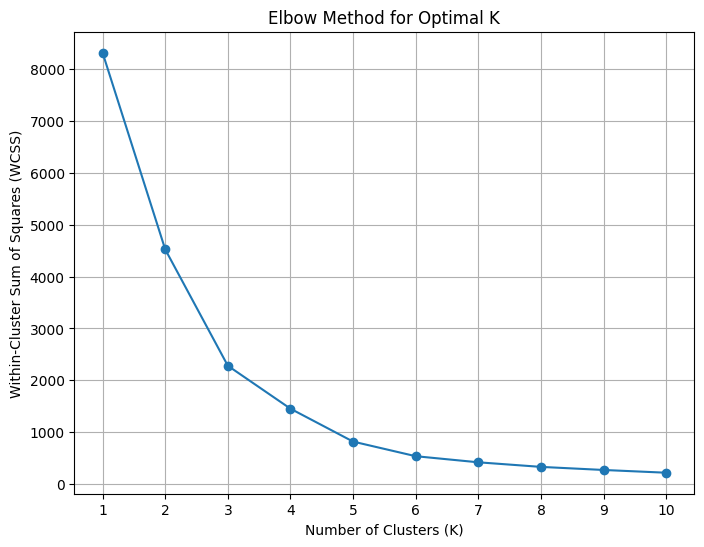

In [37]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for different K values
wcss = []

# Define the range of K values to test (e.g., from 1 to 10 clusters)
k_values = range(1, 11)

# Iterate over each K value and fit KMeans to compute WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_train_scaled[features_to_scale])  # Use only the scaled features for clustering
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow curve to visualize the optimal K value
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [38]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize DBSCAN with epsilon and min_samples parameters
epsilon = 0.5  # Adjust epsilon based on your data and desired clustering granularity
min_samples = 5  # Minimum number of samples in a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN on the scaled training data
dbscan_clusters = dbscan.fit_predict(df_train_scaled[features_to_scale])  # Use only the scaled features

# Evaluate DBSCAN clustering using silhouette score
silhouette_dbscan = silhouette_score(df_train_scaled[features_to_scale], dbscan_clusters)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)

# Compare the number of clusters formed by DBSCAN
num_dbscan_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print("Number of Clusters (DBSCAN):", num_dbscan_clusters)

# Compare the results of clusters from KMeans and DBSCAN
kmeans_clusters = kmeans.labels_
num_kmeans_clusters = len(set(kmeans_clusters))
print("Number of Clusters (KMeans):", num_kmeans_clusters)

# Evaluate KMeans clustering using silhouette score
silhouette_kmeans = silhouette_score(df_train_scaled[features_to_scale], kmeans_clusters)
print("Silhouette Score (KMeans):", silhouette_kmeans)


Silhouette Score (DBSCAN): 0.8414555086103009
Number of Clusters (DBSCAN): 2
Number of Clusters (KMeans): 10
Silhouette Score (KMeans): 0.5696818840355129


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

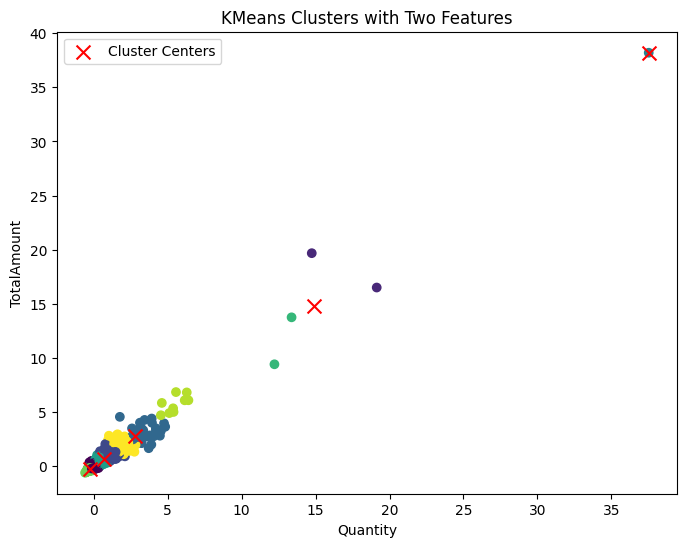

In [40]:
# Choose two features for 2D analysis and visualization (e.g., 'Quantity' and 'TotalAmount')
features_2d = ['Quantity', 'TotalAmount']

# Plot the clusters with different colors using predicted cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(df_train_scaled[features_2d[0]], df_train_scaled[features_2d[1]], c=kmeans_clusters, cmap='viridis')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', c='red', s=100, label='Cluster Centers')
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title('KMeans Clusters with Two Features')
plt.legend()
plt.show()


In [42]:
# TODOOO

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

Accuracy of the model: 0.8161057692307693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [45]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [48]:
# Convert categorical variables into numerical format using one-hot encoding (if needed)
df_test_encoded = pd.get_dummies(test, columns=['Country'])

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?